<a href="https://colab.research.google.com/github/JeffersonEspinalA/Prueba/blob/main/1301_johnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import math

def bellmanFord(G, s): # returns the path π and and whether or not a negative cycle exists
    n = len(G)                      # |V|
    π = [-1]*n                      # path
    g = [math.inf]*n                # cost
    g[s] = 0

    for _ in range(n-1):            # repetir |V| - 1 veces
        for u in range(n):
            for v, w in G[u]:       # para cada arco (u, v, con peso w) de E
                f = g[u] + w
                if f < g[v]:        # relax(u, v, w)
                    g[v] = f
                    π[v] = u

    
    for u in range(n):              # para cada arco (u, v, con peso w) de E
        for v, w in G[u]:
            f = g[u] + w
            if f < g[v]:            # se puede relajar?
                return None, None         # existe ciclo negativo

    return π, g                     # no existe ciclo negativo

In [12]:
import heapq as hq
import math

def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
          f = g + w
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

In [13]:
!git clone https://github.com/lmcanavals/acomplex.git

fatal: destination path 'acomplex' already exists and is not an empty directory.


In [14]:
from acomplex import graphstuff as gs

In [15]:
%%file 1201a.al
3 2
0 6 2 3
0 4 3 5
1 -7 2 -3

Overwriting 1201a.al


In [25]:
labels = "wxyzS"

In [26]:
import numpy as np

def johnson(G):
  n = len(G)
  G.append([(n-1, 0)])
  _, g = bellmanFord(G, n)
  if g == None:
    return None
  G.pop()
  Gprime = [[(v, w + g[u] - g[v]) for v, w in G[u]] for u in range(n)]

  paths = np.full((n, n), -1, dtype=int)
  for u in range(n):
    path, _ = dijkstra(Gprime, u)
    paths[u] = path

  return paths

In [27]:
G = gs.loadGraphAL("1201a.al")
paths = johnson(G)
print(paths)

[[-1  3  1  0]
 [ 1 -1  1  0]
 [ 2  3 -1  2]
 [ 1  3  1 -1]]


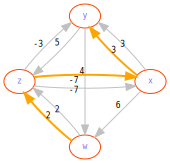

In [28]:
gs.adjlShow(G, labels, path=paths[0], directed = True, weighted = True, layout= "circo")

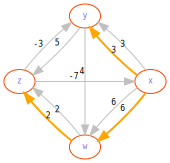

In [29]:
gs.adjlShow(G, labels, path=paths[1], directed = True, weighted = True, layout= "circo")

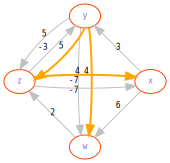

In [30]:
gs.adjlShow(G, labels, path=paths[2], directed = True, weighted = True, layout= "circo")

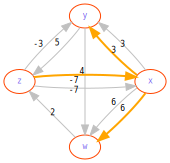

In [31]:
gs.adjlShow(G, labels, path=paths[3], directed = True, weighted = True, layout= "circo")